In [1]:
# import necessary libraries to start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# import data (exported from 2_data_cleaning_eda.ipynb)
all_data = pd.read_csv('nyc_high_schools_complete_clean.csv', index_col=0)
all_data.head()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,district_admin_code,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,...,dropouts_percent,major_crimes,violation_offenses,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency,all_crime,label
DBN,,,,,,,,,,,,,,,,,,,,,
1501M292,0.376471,0.623529,0.866667,1321.166667,1,2.18,2.06,64,66,53,...,0.095890,732,506,420,1197,238,0.398837,4.24,1238,0
1501M448,0.378289,0.621711,0.891447,1321.166667,1,2.27,2.37,64,69,67,...,0.097561,732,506,420,1144,268,0.321911,4.64,1238,0
1501M450,0.469970,0.530030,0.735736,1324.500000,1,2.66,2.63,65,75,64,...,0.034091,1331,584,420,1327,271,0.399807,5.29,1915,1
1501M509,0.567493,0.432507,0.845730,1321.166667,1,2.28,2.09,61,69,63,...,0.176471,732,506,450,1245,257,0.425334,4.37,1238,0
1501M539,0.515274,0.484726,0.273199,1321.166667,1,3.50,3.53,80,91,87,...,0.008197,732,506,465,1859,346,0.280110,7.03,1238,1


In [3]:
list(all_data)

['female_percent',
 'male_percent',
 'poverty_percent',
 'avg_home_value_sqft',
 'district_admin_code',
 'grade8_english',
 'grade8_math',
 'regents_algebra',
 'regents_english',
 'regents_history_global',
 'regents_living_environ',
 'sat_reading',
 'sat_math',
 'sat_writing',
 'college_readiness_index',
 'cuny_2yr',
 'cuny_4yr',
 'college_career_readiness_index',
 'enrollment',
 'graduation_rate',
 'college_nys_private',
 'college_nys_public',
 'college_out_of_state',
 'asian_percent',
 'black_percent',
 'ell_percent',
 'hispanic_percent',
 'self-contained_percent',
 'disability_percent',
 'white_percent',
 'cte_percent',
 'arts_percent',
 'ap_exams_percent_scoring_3plus',
 'act_percent_took_exam',
 'sat_percent_took_exam',
 'post-secondary_enroll_rate',
 'student_attendance_rate',
 'school_environment_survey',
 'teacher_attendance',
 'principal_year_exp',
 'zip_code',
 'dropouts_percent',
 'major_crimes',
 'violation_offenses',
 'school_day_length',
 'sat_score_overall',
 'regents_sc

In [4]:
data = all_data.copy()

In [5]:
# Need to drop more features for fair evaluation:
# graduation rates, college readiness index (since they are all tied to the model used to calculate the label)
data = data.drop(['college_readiness_index', 'graduation_rate', 'college_career_readiness_index'], axis=1)

In [6]:
# Really should drop any exam scores used to calculate the college readiness index (SAT scores, Regents scores, APs)
# Nervous about results, so will create a separate dataframe for comparison
data_noexam = data.drop(['regents_algebra', 'regents_english', 'regents_history_global',
                        'regents_living_environ', 'sat_math', 'sat_reading',
                        'sat_writing', 'ap_exams_percent_scoring_3plus', 'sat_score_overall', 'regents_score_overall'], axis=1)

In [7]:
# create a dataset with dummy categoricals for only zip
data_zip = data_noexam.drop('district_admin_code', axis=1)

In [8]:
data_zip['zip_code'] = data_zip['zip_code'].astype(int)

In [9]:
data_zip['zip_code'] = data_zip['zip_code'].astype('category')

In [10]:
zip_code_dummy = pd.get_dummies(data_zip['zip_code'])

In [11]:
data_zip = pd.concat([data_zip, zip_code_dummy], axis=1)

In [12]:
data_zip.head()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,grade8_english,grade8_math,cuny_2yr,cuny_4yr,enrollment,college_nys_private,...,11419,11420,11423,11426,11427,11432,11433,11434,11691,11694
DBN,,,,,,,,,,,,,,,,,,,,,
1501M292,0.376471,0.623529,0.866667,1321.166667,2.18,2.06,0.131,0.066,255,0.000,...,0,0,0,0,0,0,0,0,0,0
1501M448,0.378289,0.621711,0.891447,1321.166667,2.27,2.37,0.197,0.169,304,0.042,...,0,0,0,0,0,0,0,0,0,0
1501M450,0.469970,0.530030,0.735736,1324.500000,2.66,2.63,0.111,0.144,666,0.189,...,0,0,0,0,0,0,0,0,0,0
1501M509,0.567493,0.432507,0.845730,1321.166667,2.28,2.09,0.100,0.083,363,0.017,...,0,0,0,0,0,0,0,0,0,0
1501M539,0.515274,0.484726,0.273199,1321.166667,3.50,3.53,0.044,0.168,1735,0.248,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# create a dataset with dummy categoricals for only administrative district
data_admin = data_noexam.drop('zip_code', axis=1)

In [14]:
dac_dummy = pd.get_dummies(data_admin['district_admin_code'])

In [15]:
data_admin = pd.concat([data_admin, dac_dummy], axis=1)

In [16]:
# make sure that the non-categorical dataframes don't have them
data_noexam = data_noexam.drop(['zip_code', 'district_admin_code'], axis=1)
data = data.drop(['zip_code', 'district_admin_code'], axis=1)

#### MINIMUM BENCHMARK

In [17]:
# Count of high schools with cri above nyc's average grad rate (within one standard deviation) 
# divided by amount of rows to determine benchmark for minimum performance
data_noexam['label'].value_counts().head(1) / len(data_noexam['label'])

0    0.870769
Name: label, dtype: float64

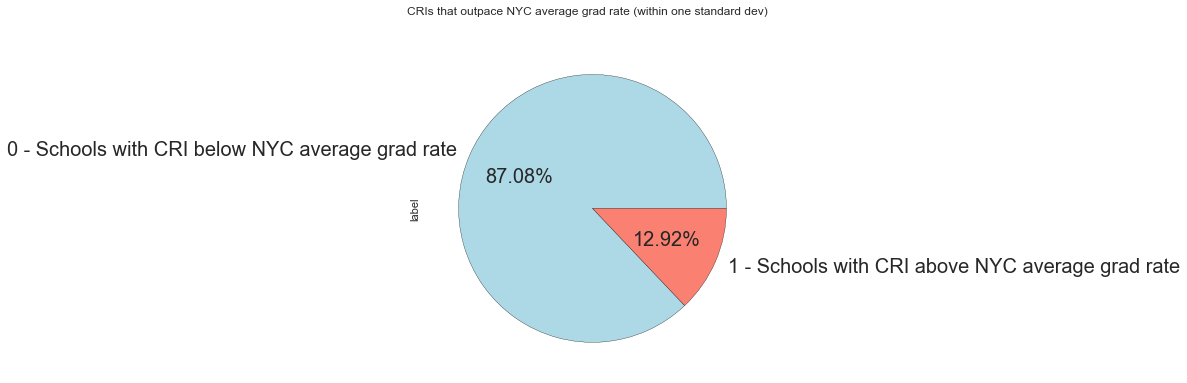

In [18]:
# visualization of the above
data_noexam['label'].value_counts().plot(title='CRIs that outpace NYC average grad rate (within one standard dev)', subplots=True, kind='pie', autopct='%.2f%%', colors=['LightBlue', 'Salmon'], 
                                      fontsize=20, labels=['0 - Schools with CRI below NYC average grad rate', '1 - Schools with CRI above NYC average grad rate'], figsize=(6,6));

#### RANDOM FOREST

In [19]:
# Assign data to X and y (3x for each dataset I wish to test)
# note that data has exams that feed into cri and hopefully is just for comparison
y1 = data['label']
y2 = data_noexam['label']
y3 = data_admin['label']
y4 = data_zip['label']

X1 = data.drop('label', axis=1)
X2 = data_noexam.drop('label', axis=1)
X3 = data_admin.drop('label', axis=1)
X4 = data_zip.drop('label', axis=1)

In [20]:
# break up the data into test and training sets:
from sklearn.cross_validation import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=1)

In [21]:
# 20% test / 80% train / 10 cross validation iterations 
from sklearn.cross_validation import ShuffleSplit
cv1 = ShuffleSplit(X_train1.shape[0], n_iter=10, test_size=0.2, random_state=0)
cv2 = ShuffleSplit(X_train2.shape[0], n_iter=10, test_size=0.2, random_state=0)
cv3 = ShuffleSplit(X_train3.shape[0], n_iter=10, test_size=0.2, random_state=0)
cv4 = ShuffleSplit(X_train4.shape[0], n_iter=10, test_size=0.2, random_state=0)

In [22]:
# standardization for models that use euclidian distances
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# transform training features
X_train_std1 = stdsc.fit_transform(X_train1)
# transform the testing features in the same way
X_test_std1 = stdsc.transform(X_test1)

X_train_std2 = stdsc.fit_transform(X_train2)
X_test_std2 = stdsc.transform(X_test2)

X_train_std3 = stdsc.fit_transform(X_train3)
X_test_std3 = stdsc.transform(X_test3)

X_train_std4 = stdsc.fit_transform(X_train4)
X_test_std4 = stdsc.transform(X_test4)

In [23]:
# import and create random forest
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()

In [24]:
# find best params - first for all_data
from sklearn.grid_search import GridSearchCV
parameters = {'n_estimators': range(1, 101, 5)}
clfrf1 = GridSearchCV(rfmodel, parameters, cv=cv1)

In [25]:
# this is for data -- df with exams; hopefully can be discarded later; will likely perform best
clfrf1.fit(X_train1, y_train1)
clfrf1.best_params_

{'n_estimators': 71}

In [26]:
# this is for data_noexam -- likely the second-best performing and main model, unless one of the geo ones outperform it
clfrf2 = GridSearchCV(rfmodel, parameters, cv=cv2)
clfrf2.fit(X_train2, y_train2)
clfrf2.best_params_

{'n_estimators': 11}

In [27]:
# this is for data_admin
clfrf3 = GridSearchCV(rfmodel, parameters, cv=cv3)
clfrf3.fit(X_train3, y_train3)
clfrf3.best_params_

{'n_estimators': 61}

In [28]:
# this is for data_zip
clfrf4 = GridSearchCV(rfmodel, parameters, cv=cv4)
clfrf4.fit(X_train4, y_train4)
clfrf4.best_params_

{'n_estimators': 41}

In [29]:
# top cv score for data
clfrf1.best_score_

0.96025641025641029

In [30]:
# top cv score for data_noexam
clfrf2.best_score_

0.95256410256410251

In [31]:
# top cv score for data_admin
clfrf3.best_score_

0.95192307692307687

In [32]:
# top cv score for data_zip
clfrf4.best_score_

0.95320512820512826

In [33]:
best_rf1 = clfrf1.best_estimator_

In [34]:
best_rf2 = clfrf2.best_estimator_

In [35]:
best_rf3 = clfrf3.best_estimator_

In [36]:
best_rf4 = clfrf4.best_estimator_

In [37]:
# Evaluate the Random Forest model using cross-validation (for data)
from sklearn.cross_validation import cross_val_score

scores1 = cross_val_score(rfmodel, X_train1, y_train1, scoring='accuracy')
print('CV accuracy {}, Average accuracy {}'.format(scores1, scores1.mean()))

CV accuracy [ 0.94252874  0.96153846  0.96525097], Average accuracy 0.956439387474


In [38]:
#^ for data_noexam
scores2 = cross_val_score(rfmodel, X_train2, y_train2, scoring='accuracy')
print('CV accuracy {}, Average accuracy {}'.format(scores2, scores2.mean()))

CV accuracy [ 0.93869732  0.95769231  0.96138996], Average accuracy 0.952593195697


In [39]:
#^ for data_admin
scores3 = cross_val_score(rfmodel, X_train3, y_train3, scoring='accuracy')
print('CV accuracy {}, Average accuracy {}'.format(scores3, scores3.mean()))

CV accuracy [ 0.94252874  0.96153846  0.95366795], Average accuracy 0.952578383613


In [40]:
#^ for data_zip
scores4 = cross_val_score(rfmodel, X_train4, y_train4, scoring='accuracy')
print('CV accuracy {}, Average accuracy {}'.format(scores4, scores4.mean()))

CV accuracy [ 0.95019157  0.95384615  0.95366795], Average accuracy 0.952568559465


In [41]:
# check accuracy with test set - data
best_rf1.score(X_test1, y_test1)

0.9538461538461539

In [42]:
# Precision / Recall / F1
from sklearn.metrics import precision_recall_fscore_support

predrf1 = clfrf1.predict(X_test1)
precision_recall_fscore_support(predrf1, y_test1, average='binary') 

(0.77272727272727271, 0.80952380952380953, 0.79069767441860461, None)

In [43]:
# check accuracy with test set - data_noexam
best_rf2.score(X_test2, y_test2)

0.95897435897435901

In [44]:
# Precision / Recall / F1

predrf2 = clfrf2.predict(X_test2)
precision_recall_fscore_support(predrf2, y_test2, average='binary') 

(0.77272727272727271, 0.84999999999999998, 0.80952380952380953, None)

In [45]:
# check accuracy with test set - data_admin
best_rf3.score(X_test3, y_test3)

0.95897435897435901

In [46]:
# Precision / Recall / F1

predrf3 = clfrf3.predict(X_test3)
precision_recall_fscore_support(predrf3, y_test3, average='binary') 

(0.77272727272727271, 0.84999999999999998, 0.80952380952380953, None)

In [47]:
# check accuracy with test set - data_zip
best_rf4.score(X_test4, y_test4)

0.97435897435897434

In [48]:
# Precision / Recall / F1

predrf4 = clfrf4.predict(X_test4)
precision_recall_fscore_support(predrf4, y_test4, average='binary') 

(0.86363636363636365, 0.90476190476190477, 0.88372093023255816, None)

In [49]:
# timing - data
%timeit best_rf1.predict(X_test1)

100 loops, best of 3: 5.89 ms per loop


In [50]:
# timing - data_noexam
%timeit best_rf2.predict(X_test2)

1000 loops, best of 3: 1.19 ms per loop


In [51]:
# timing - data_admin
%timeit best_rf3.predict(X_test3)

100 loops, best of 3: 5.43 ms per loop


In [52]:
# timing - data_zip
%timeit best_rf4.predict(X_test4)

100 loops, best of 3: 5.58 ms per loop


In [53]:
# get ready to plot learning curves for random forests
from sklearn.learning_curve import learning_curve
title = 'title'
learning_curve(best_rf2, X_train2, y_train2, cv=cv2)

(array([ 62, 202, 343, 483, 624]),
 array([[ 1.        ,  1.        ,  0.98387097,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  0.9950495 ,
          0.9950495 ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.99708455,  1.        ,  0.99708455,  1.        ,  0.9941691 ,
          0.9941691 ,  1.        ,  1.        ,  0.9941691 ,  0.99708455],
        [ 0.99792961,  0.99792961,  0.99792961,  0.99585921,  0.99792961,
          0.99792961,  1.        ,  0.99792961,  0.99792961,  0.99792961],
        [ 0.99839744,  0.99839744,  1.        ,  0.99839744,  0.99519231,
          0.99839744,  0.99519231,  0.99679487,  0.99679487,  1.        ]]),
 array([[ 0.92307692,  0.91025641,  0.90384615,  0.8974359 ,  0.93589744,
          0.93589744,  0.91025641,  0.93589744,  0.95512821,  0.91025641],
        [ 0.92948718,  0.92948718,  0.92948718,  0.96153846,  0.97435

In [54]:
def plot_learning_curve(estimator, title, X2, y2, ylim=None, cv=None,
                       train_sizes=np.linspace(.2,1.0,10), n_jobs=1):
    """Create a learning curve to help
    us determine if we are overfitting
    or underfitting.
    
    Parameters
    ----------
    estimator (variable name) : our ML algorithm we want to plot

    title (string) : title for our chart

    X3 : our training dataframe

    y3 : our training labels

    ylim (tuple): min, max of the score, ie % accuracy

    cv3 (variable name) : pass through for our CV strategy
    
    train_sizes (list-like) : the increments of % of our training data to use
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Number of training examples used")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X3, y3, cv=cv3, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

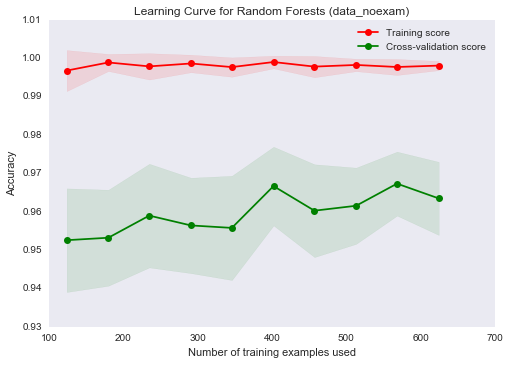

In [55]:
plot_learning_curve(best_rf2, 'Learning Curve for Random Forests (data_noexam)', X_train2, y_train2, cv=cv2);

In [56]:
from sklearn.learning_curve import learning_curve
title = 'title'
learning_curve(best_rf3, X_train3, y_train3, cv=cv3)

(array([ 62, 202, 343, 483, 624]),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.        ,  0.99708455,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ]]),
 array([[ 0.93589744,  0.93589744,  0.92307692,  0.91666667,  0.94871795,
          0.95512821,  0.92307692,  0.92948718,  0.94230769,  0.88461538],
        [ 0.94230769,  0.92948718,  0.92948718,  0.95512821,  0.96794

In [57]:
def plot_learning_curve(estimator, title, X3, y3, ylim=None, cv=None,
                       train_sizes=np.linspace(.2,1.0,10), n_jobs=1):
    """Create a learning curve to help
    us determine if we are overfitting
    or underfitting.
    
    Parameters
    ----------
    estimator (variable name) : our ML algorithm we want to plot

    title (string) : title for our chart

    X3 : our training dataframe

    y3 : our training labels

    ylim (tuple): min, max of the score, ie % accuracy

    cv3 (variable name) : pass through for our CV strategy
    
    train_sizes (list-like) : the increments of % of our training data to use
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Number of training examples used")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X3, y3, cv=cv3, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

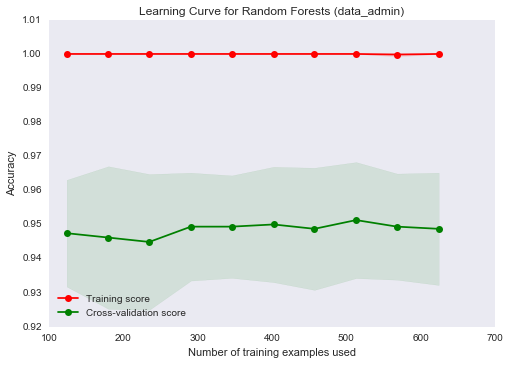

In [58]:
plot_learning_curve(best_rf3, 'Learning Curve for Random Forests (data_admin)', X_train3, y_train3, cv=cv3);

In [59]:
from sklearn.learning_curve import learning_curve
title = 'title'
learning_curve(best_rf4, X_train4, y_train4, cv=cv4)

(array([ 62, 202, 343, 483, 624]),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  0.99708455,  1.        ,  1.        ,  1.        ],
        [ 1.        ,  0.99792961,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.        ,  0.99679487,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  0.99839744,  1.        ]]),
 array([[ 0.92948718,  0.92948718,  0.91025641,  0.92307692,  0.95512821,
          0.94871795,  0.91666667,  0.93589744,  0.93589744,  0.88461538],
        [ 0.93589744,  0.91666667,  0.94230769,  0.95512821,  0.97435

In [60]:
def plot_learning_curve(estimator, title, X4, y4, ylim=None, cv=None,
                       train_sizes=np.linspace(.2,1.0,10), n_jobs=1):
    """Create a learning curve to help
    us determine if we are overfitting
    or underfitting.
    
    Parameters
    ----------
    estimator (variable name) : our ML algorithm we want to plot

    title (string) : title for our chart

    X3 : our training dataframe

    y3 : our training labels

    ylim (tuple): min, max of the score, ie % accuracy

    cv3 (variable name) : pass through for our CV strategy
    
    train_sizes (list-like) : the increments of % of our training data to use
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Number of training examples used")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X3, y3, cv=cv3, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

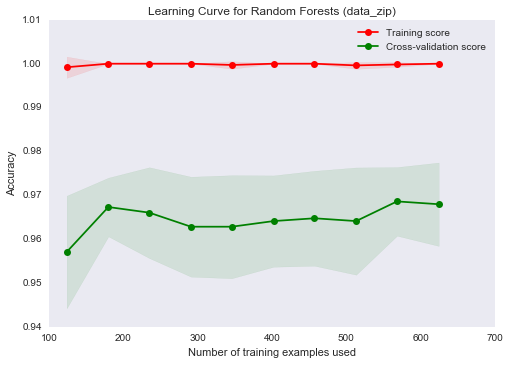

In [61]:
plot_learning_curve(best_rf4, 'Learning Curve for Random Forests (data_zip)', X_train4, y_train4, cv=cv4);

In [62]:
# Use RF to find most important features - data (will likely be test-heavy)
features = X1.columns
feature_importances = best_rf1.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(20)

,Features,Importance Score
40,sat_score_overall,0.142050
11,sat_math,0.113417
43,grade8_proficiency,0.085858
10,sat_reading,0.065461
4,grade8_english,0.058595
41,regents_score_overall,0.057297
5,grade8_math,0.054357
31,post-secondary_enroll_rate,0.052903
12,sat_writing,0.051505
32,student_attendance_rate,0.032953


In [63]:
# Use RF to find most important features - data_noexam (will hopefully find interesting factors here)
features = X2.columns
feature_importances = best_rf2.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(20)

,Features,Importance Score
4,grade8_english,0.154855
28,dropouts_percent,0.116998
5,grade8_math,0.108643
24,student_attendance_rate,0.102605
33,grade8_proficiency,0.096839
23,post-secondary_enroll_rate,0.059962
7,cuny_4yr,0.043111
22,sat_percent_took_exam,0.037006
9,college_nys_private,0.025561
12,asian_percent,0.022963


In [64]:
# Use RF to find most important features - data_admin
features = X3.columns
feature_importances = best_rf3.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(20)

,Features,Importance Score
6,grade8_math,0.120872
34,grade8_proficiency,0.108906
24,post-secondary_enroll_rate,0.108257
5,grade8_english,0.089204
25,student_attendance_rate,0.069549
23,sat_percent_took_exam,0.062166
29,dropouts_percent,0.059359
13,asian_percent,0.035366
12,college_out_of_state,0.025948
15,ell_percent,0.025395


In [65]:
# Use RF to find most important features - data_zip
features = X4.columns
feature_importances = best_rf4.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(20)

,Features,Importance Score
5,grade8_math,0.134057
23,post-secondary_enroll_rate,0.101403
24,student_attendance_rate,0.081329
4,grade8_english,0.075364
34,grade8_proficiency,0.073986
22,sat_percent_took_exam,0.070655
29,dropouts_percent,0.050090
14,ell_percent,0.035500
9,college_nys_private,0.033554
21,act_percent_took_exam,0.026755


#### LOGISTIC REGRESSION AND SVM

In [66]:
# import and create logistic regresstion
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [67]:
# import and create svm
from sklearn.svm import SVC
svm = SVC()

In [68]:
# tried svm --> data_noexam (FROZE IPYTHON SEVERAL TIMES)
#parameters_svm = {'C': np.linspace(.001, 10, 10), 'kernel': ['poly', 'rbf'],
#         'degree': range(1,4), 'gamma': np.linspace(.001, 10, 10)}
#clfsvm2 = GridSearchCV(svm, parameters_svm, cv=cv2, n_jobs=-1)
#clfsvm2.fit(X_train2, y_train2)

In [69]:
# tune params via gridsearch --> for data_noexam (FROZE IPYTHON SEVERAL TIMES)
#parameterslr = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight':['auto', None], 'penalty': ['l1', 'l2']} 
#clflr2 = GridSearchCV(logreg, parameterslr, cv=cv2)
#clflr2.fit(X_train_std2, y_train2)

#### k-means

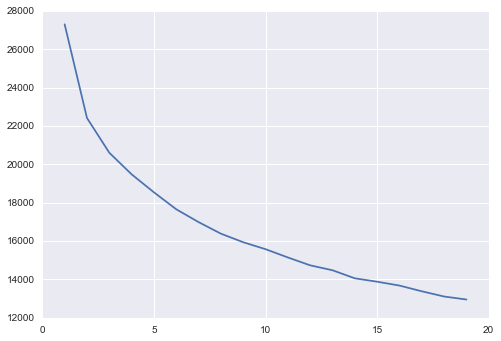

In [70]:
from sklearn.cluster import KMeans

# look at inertia plot (how close together are the points in the clusters) -- no_noexam
x = []
y = []
for n in range(1,20):
    km22 = KMeans(n_clusters=n)
    km22.fit(X_train_std2)
    x.append(n)
    y.append(km22.inertia_)
plt.plot(x, y);

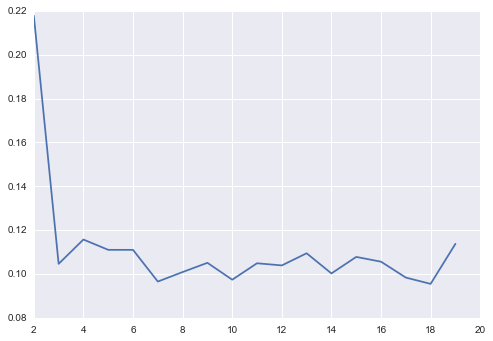

In [71]:
from sklearn.metrics import silhouette_score

# look at silhouette plot (density and separation of each cluster) -- data_noexam
x = []
y = []
for n in range(2,20):
    km22 = KMeans(n_clusters=n)
    centers = km22.fit_predict(X_train_std2)
    x.append(n)
    y.append(silhouette_score(X_train_std2, centers))
plt.plot(x, y);

In [72]:
%%timeit
# I'm going to choose k=5
km2 = KMeans(n_clusters=5, n_init=20)
cluster_labels2 = km2.fit_predict(X_train_std2)

1 loops, best of 3: 228 ms per loop


In [73]:
km2 = KMeans(n_clusters=5, n_init=20)
cluster_labels2 = km2.fit_predict(X_train_std2)

In [74]:
print 'DATA_IMPUTED:\nInertia score: {} \nSilhouette score: {}'.format(km2.inertia_, silhouette_score(X_train_std2, cluster_labels2))

DATA_IMPUTED:
Inertia score: 18541.7854089 
Silhouette score: 0.0947898386888


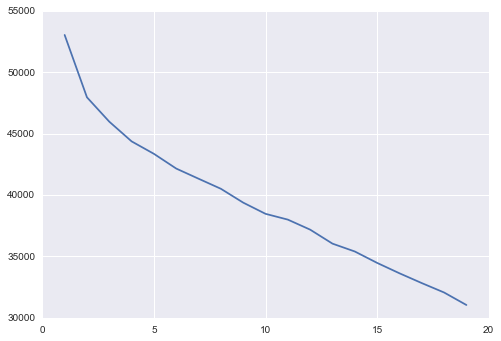

In [75]:
# look at inertia plot (how close together are the points in the clusters) -- data_admin
x = []
y = []
for n in range(1,20):
    km33 = KMeans(n_clusters=n)
    km33.fit(X_train_std3)
    x.append(n)
    y.append(km33.inertia_)
plt.plot(x, y);

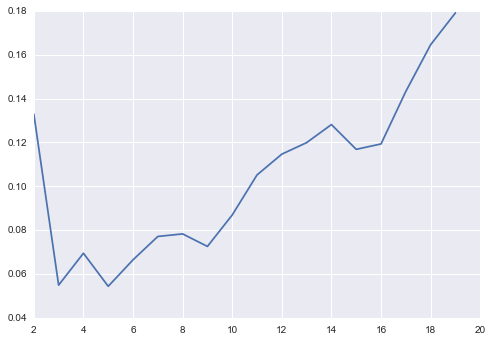

In [76]:
# look at silhouette plot (density and separation of each cluster) -- data_admin
x = []
y = []
for n in range(2,20):
    km33 = KMeans(n_clusters=n)
    centers = km33.fit_predict(X_train_std3)
    x.append(n)
    y.append(silhouette_score(X_train_std3, centers))
plt.plot(x, y);

In [77]:
%%timeit
# I'm going to choose k=5
km3 = KMeans(n_clusters=12, n_init=20)
cluster_labels3 = km3.fit_predict(X_train_std3)

1 loops, best of 3: 312 ms per loop


In [78]:
km3 = KMeans(n_clusters=12, n_init=20)
cluster_labels3 = km3.fit_predict(X_train_std3)

In [79]:
print 'DATA_FENGINEERED:\nInertia score: {} \nSilhouette score: {}'.format(km3.inertia_, silhouette_score(X_train_std3, cluster_labels3))

DATA_FENGINEERED:
Inertia score: 36916.9701286 
Silhouette score: 0.105808205468


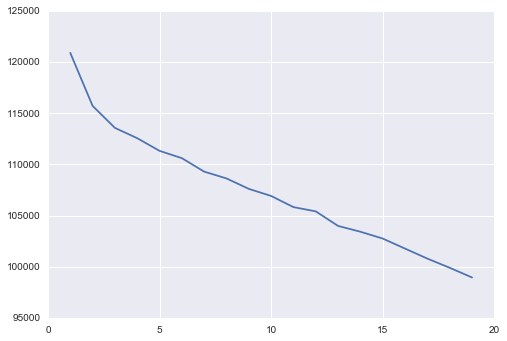

In [80]:
# look at inertia plot (how close together are the points in the clusters) -- data_zip
x = []
y = []
for n in range(1,20):
    km44 = KMeans(n_clusters=n)
    km44.fit(X_train_std4)
    x.append(n)
    y.append(km44.inertia_)
plt.plot(x, y);

/Users/hopper/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


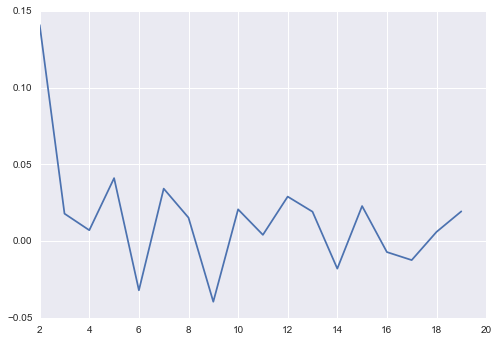

In [81]:
# look at silhouette plot (density and separation of each cluster) -- data_zip
x = []
y = []
for n in range(2,20):
    km44 = KMeans(n_clusters=n)
    centers = km44.fit_predict(X_train_std4)
    x.append(n)
    y.append(silhouette_score(X_train_std4, centers))
plt.plot(x, y);

In [82]:
%%timeit
# I'm going to choose k=10
km4 = KMeans(n_clusters=6, n_init=20)
cluster_labels4 = km4.fit_predict(X_train_std4)

1 loops, best of 3: 267 ms per loop


In [83]:
km4 = KMeans(n_clusters=6, n_init=20)
cluster_labels4 = km4.fit_predict(X_train_std4)

In [84]:
print 'DATA_DROPPED:\nInertia score: {} \nSilhouette score: {}'.format(km4.inertia_, silhouette_score(X_train_std4, cluster_labels4))

DATA_DROPPED:
Inertia score: 109910.910294 
Silhouette score: 0.03065223933


In [85]:
km2.cluster_centers_

array([[-0.01622666,  0.01623006,  0.22123635,  0.11719462, -0.204404  ,
        -0.2849204 ,  0.09670143, -0.18504043, -0.24635651, -0.16165889,
        -0.00611054, -0.19405737, -0.31711181,  0.30475516, -0.22507829,
         0.01651564, -0.12529671,  0.1789855 , -0.29974442, -0.01909084,
         0.00460472, -0.21248229, -0.05351707, -0.13189843, -0.01374613,
        -0.11567863,  0.10446339, -0.05334193, -0.14023126, -0.23566794,
        -0.27173008,  0.02059284,  0.12127077, -0.25001045, -0.26389487],
       [ 0.49578341, -0.49578006, -2.28565928,  0.96699763,  2.76195213,
         2.73917446, -1.36538957,  0.87692895,  0.64397138,  2.02465112,
         1.30051976,  2.88616522,  1.71904619, -0.99849767, -0.62271888,
        -1.10004977, -0.89054578, -1.54438024,  2.05498537, -0.11503743,
         0.61931328,  1.89943796,  1.41842342,  1.84166825,  1.36487225,
         0.99981151,  0.39109632,  0.13524409, -1.11920011, -0.25212754,
        -0.45414049, -0.18426901, -0.8189372 ,  2.

In [87]:
stdsc.inverse_transform(km2.cluster_centers_)

ValueError: operands could not be broadcast together with shapes (5,35) (156,) (5,35) 

In [89]:
# check cluster centers for each cluster -- for data_noexam 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
columns = {str(x): stdsc.inverse_transform(km2.cluster_centers_[x]) for x in range(0,len(km2.cluster_centers_))}
pd.DataFrame(columns, index=X_train2.columns)

ValueError: operands could not be broadcast together with shapes (35,) (156,) (35,) 

#### TO DO :

- Figure out why inverse_transform isn't working 
- Finish clustering work (if possible)
- Possibly select most important features from RF and apply those to LR so I can use at least one other supervised model (right now LR and SVM won't run on even my smallest dataset, possibly due to high number of features)
- More visuals